### Necessary libraries

In [4]:
import os
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, train_test_split

### Paths

In [3]:
#REPOSITORY PATH OF PROJECT
(Tempo,_) = os.path.split(os.getcwd())
Tempo,_ = os.path.split(Tempo)
PATH_PROJECT,DEV = os.path.split(Tempo)
PATH_DEV = os.path.join(PATH_PROJECT,'Dev')
PATH_DATA = os.path.join(PATH_PROJECT,'Data')
PATH_DATA_IMAGES = os.path.join(PATH_DATA,'Data Images')
DATA_CBIRH_5_500 = os.path.join(PATH_DATA_IMAGES,'DATA_CBIRH_5_500')
PATH_DATA_CSV = os.path.join(os.path.join(os.path.join(PATH_DATA,'Data Descriptors'),'Data Feautures_5_500'),'Three Descriptors')
LIST_CLASS = os.listdir(PATH_DATA_CSV)
print(LIST_CLASS)

['DF_CH_FG_HM.csv', 'DF_CH_FG_SIFT.csv', 'DF_CH_GCM_HM.csv', 'DF_CH_GCM_SIFT.csv', 'DF_CH_TH_HM.csv', 'DF_CH_TH_SIFT-L2621232.csv', 'DF_CH_TH_SIFT.csv', 'DF_DCD_FG_HM.csv', 'DF_DCD_FG_SIFT.csv', 'DF_DCD_GCM_HM.csv', 'DF_DCD_GCM_sift.csv', 'DF_DCD_TH_HM.csv', 'DF_DCD_TH_SIFT.csv', 'test.csv']


### Methods

In [3]:
# build path
def path_build(PATH_DATA_CSV):
    List_DF = []
    List_DF_without_header = []
    for i in os.listdir(PATH_DATA_CSV):
        if i.find('SIFT') !=-1:
            List_DF_without_header.append((i,PATH_DATA_CSV+"/"+i))
        else:
            List_DF.append((i,PATH_DATA_CSV+"/"+i))
    return List_DF,List_DF_without_header

#split data to X,y
def split_data(path):
    DF = pd.read_csv(path)
    DF = DF.iloc[:,1::] 
    y =  DF.label 
    del DF['label']
    X = DF
    return X,y

def split_data_without_head(path):
    DF = pd.read_csv(path)
    DF = DF.iloc[:,1::] 
    y =  y=DF[DF.columns[-1]] 
    del DF[DF.columns[-1]]
    X = DF
    return X,y

def plot_confusion_catrix(cm):
    sb.set(rc={'figure.figsize':(8,8)})
    sb.set(font_scale=1.4)#for label size
    ax = sb.heatmap(cm, annot=True, cmap ='Oranges', cbar=False)
    ax.set_title('Confusion Matrix with labels\n')
    ax.set_xlabel('\nPredicted Label')
    ax.set_ylabel('\nTrue Label ')
    _= ax.xaxis.set_ticklabels(['CAR','DOG','FRUIT','PERSON','CAT'])
    _= ax.yaxis.set_ticklabels(['CAR','DOG','FRUIT','PERSON','CAT'])

#Evaluate model    
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    errors = 1-accuracy
    Confusion_Matrix = confusion_matrix(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.2f} %.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Classification_report :\n',classification_report(test_labels,predictions))
    print('Confusion_Matrix : \n')
    plot_confusion_catrix(Confusion_Matrix)
    
#tuning hyperparameter of model       
def hyperparameter_tuning_randomrorestClassifier(xtrain,ytrain,xtest,ytest):
    start = time.time()
    rfc=RandomForestClassifier(bootstrap = False)   
    param_grid = {  'n_estimators': list(np.arange(100, 1000, 100)),
                'criterion' :['gini', 'entropy'],
                'max_depth' : np.arange(3, 10, 2),
                'min_samples_split' : np.arange(2, 10, 2),
                'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap': [True, False]
             }
    kf = KFold(n_splits=5, random_state = 0, shuffle = True)
    randomizedsearch = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid,scoring='accuracy', cv= kf)
    randomizedsearch.fit(xtrain, ytrain)
    end = time.time()
    run_time = end - start
    print("[INFO] Applying took {:.2f} seconds".format(run_time))
    return randomizedsearch

### DF_CH_GCM_HM

In [13]:
num_data_csv = 0
List_DF,_ = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF[num_data_csv][0])
#Data preparation
X,y = split_data(List_DF[num_data_csv][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = hyperparameter_tuning_randomrorestClassifier(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_CH_GCM_HM.csv
[INFO] Applying took 29.09 seconds
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=7,
                       max_features='sqrt', min_samples_split=8,
                       n_estimators=200)


Model Performance
Average Error: 0.14 %.
Accuracy = 0.86%.
Classification_report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.96      0.96      0.96        25
           2       0.70      0.81      0.75        26
           3       0.93      1.00      0.97        28
           4       0.76      0.54      0.63        24

    accuracy                           0.86       125
   macro avg       0.86      0.86      0.86       125
weighted avg       0.86      0.86      0.86       125

Confusion_Matrix : 



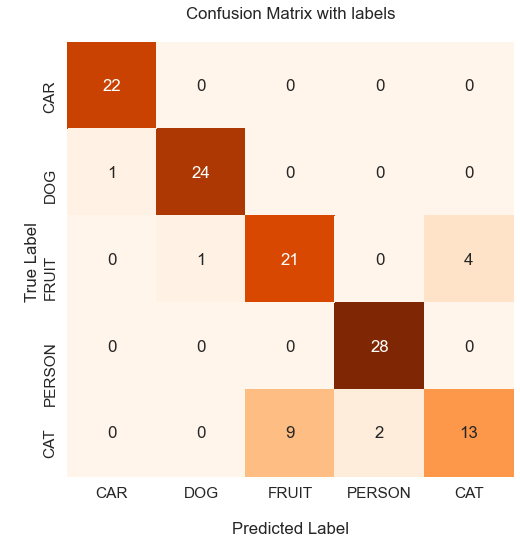

In [14]:
#evaluate best estimator
evaluate(clf,X_test,y_test)

## DF_CH_TH_HM

In [115]:
num_data_csv = 1

List_DF,_ = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF[num_data_csv][0])
#Data preparation
X,y = split_data(List_DF[num_data_csv][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = hyperparameter_tuning_randomrorestClassifier(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_CH_TH_HM.csv
[INFO] Applying took 41.90 seconds


Model Performance
Average Error: 0.15 %.
Accuracy = 0.85%.
Classification_report :
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.96      0.92      0.94        25
           2       0.69      0.69      0.69        26
           3       0.93      1.00      0.97        28
           4       0.71      0.62      0.67        24

    accuracy                           0.85       125
   macro avg       0.84      0.85      0.84       125
weighted avg       0.84      0.85      0.84       125

Confusion_Matrix : 



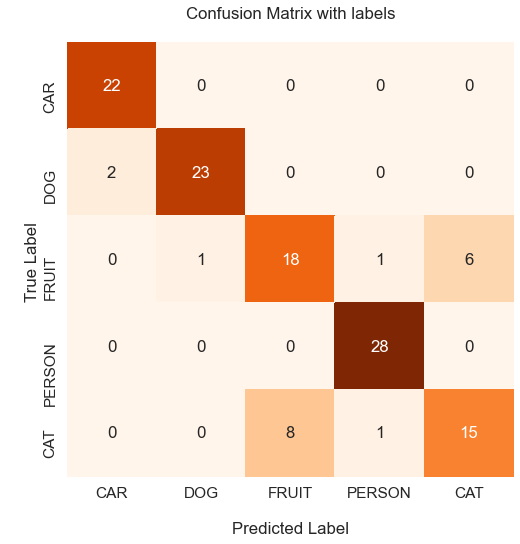

In [116]:
#evaluate best estimator
evaluate(clf,X_test,y_test)

## DF_DCD_GCM_HM

In [117]:
num_data_csv = 2
List_DF,_ = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF[num_data_csv][0])
#Data preparation
X,y = split_data(List_DF[num_data_csv][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = hyperparameter_tuning_randomrorestClassifier(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_DCD_GCM_HM.csv
[INFO] Applying took 31.95 seconds


Model Performance
Average Error: 0.25 %.
Accuracy = 0.75%.
Classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.82      0.92      0.87        25
           2       0.48      0.54      0.51        26
           3       0.83      0.89      0.86        28
           4       0.62      0.42      0.50        24

    accuracy                           0.75       125
   macro avg       0.75      0.75      0.75       125
weighted avg       0.75      0.75      0.74       125

Confusion_Matrix : 



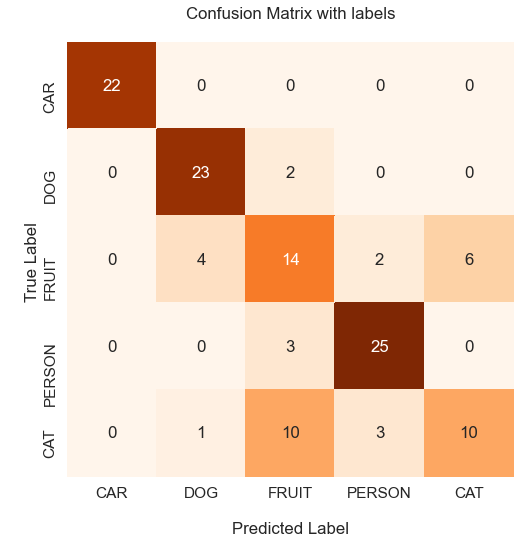

In [118]:
#evaluate best estimator
evaluate(clf,X_test,y_test)

## DF_DCD_TH_HM

In [119]:
num_data_csv = 3
List_DF,_ = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF[num_data_csv][0])
#Data preparation
X,y = split_data(List_DF[num_data_csv][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = hyperparameter_tuning_randomrorestClassifier(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_DCD_TH_HM.csv
[INFO] Applying took 30.96 seconds


Model Performance
Average Error: 0.19 %.
Accuracy = 0.81%.
Classification_report :
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.88      0.92      0.90        25
           2       0.61      0.54      0.57        26
           3       0.84      0.96      0.90        28
           4       0.75      0.62      0.68        24

    accuracy                           0.81       125
   macro avg       0.80      0.81      0.80       125
weighted avg       0.80      0.81      0.80       125

Confusion_Matrix : 



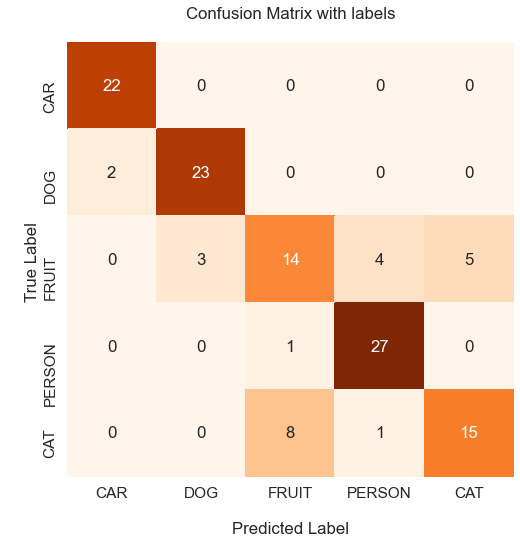

In [120]:
#evaluate best estimator
evaluate(clf,X_test,y_test)

## DF_CH_GCM_SIFT

In [121]:
num_data_csv = 0
_,List_DF_without_header = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF_without_header[num_data_csv][0])
#Data preparation
X,y = split_data_without_head(List_DF_without_header[num_data_csv][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = hyperparameter_tuning_randomrorestClassifier(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_CH_GCM_SIFT.csv
[INFO] Applying took 150.99 seconds


Model Performance
Average Error: 0.18 %.
Accuracy = 0.82%.
Classification_report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.80      0.96      0.87        25
           2       0.70      0.62      0.65        26
           3       0.84      0.96      0.90        28
           4       0.76      0.54      0.63        24

    accuracy                           0.82       125
   macro avg       0.81      0.82      0.81       125
weighted avg       0.81      0.82      0.81       125

Confusion_Matrix : 



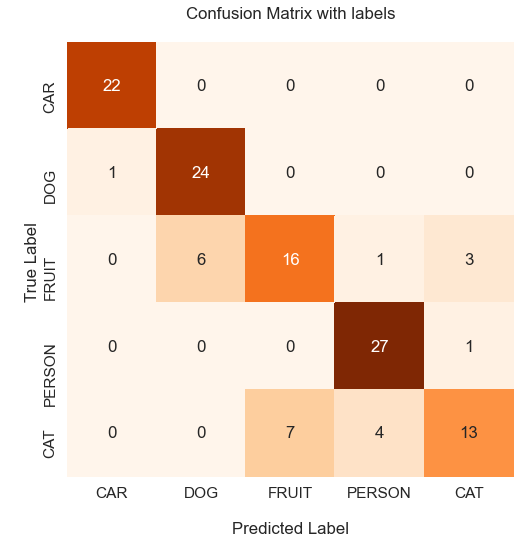

In [122]:
#evaluate best estimator
evaluate(clf,X_test,y_test)

## DF_CH_TH_SIFT

In [123]:
num_data_csv =1
_,List_DF_without_header = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF_without_header[num_data_csv][0])
#Data preparation
X,y = split_data_without_head(List_DF_without_header[num_data_csv][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = hyperparameter_tuning_randomrorestClassifier(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_CH_TH_SIFT.csv
[INFO] Applying took 145.77 seconds


Model Performance
Average Error: 0.16 %.
Accuracy = 0.84%.
Classification_report :
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.96      0.92      0.94        25
           2       0.68      0.65      0.67        26
           3       0.93      1.00      0.97        28
           4       0.68      0.62      0.65        24

    accuracy                           0.84       125
   macro avg       0.83      0.84      0.84       125
weighted avg       0.83      0.84      0.84       125

Confusion_Matrix : 



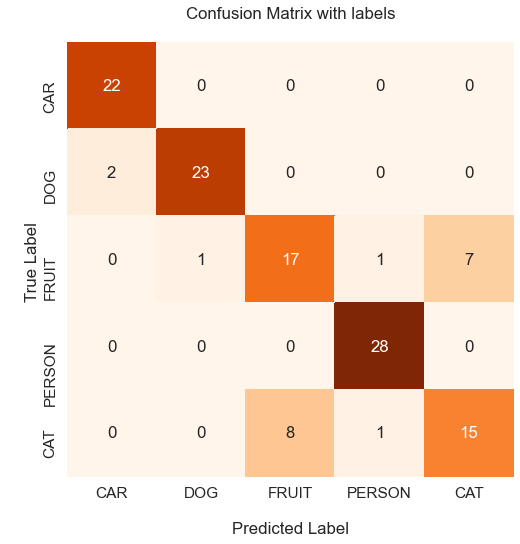

In [124]:
#evaluate best estimator
evaluate(clf,X_test,y_test)

## DF_DCD_GCM_SIFT

In [125]:
num_data_csv =2
_,List_DF_without_header = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF_without_header[num_data_csv][0])
#Data preparation
X,y = split_data_without_head(List_DF_without_header[num_data_csv][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = hyperparameter_tuning_randomrorestClassifier(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_DCD_GCM_SIFT.csv
[INFO] Applying took 250.53 seconds


Model Performance
Average Error: 0.23 %.
Accuracy = 0.77%.
Classification_report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.78      1.00      0.88        25
           2       0.62      0.38      0.48        26
           3       0.82      0.96      0.89        28
           4       0.57      0.50      0.53        24

    accuracy                           0.77       125
   macro avg       0.75      0.77      0.75       125
weighted avg       0.75      0.77      0.75       125

Confusion_Matrix : 



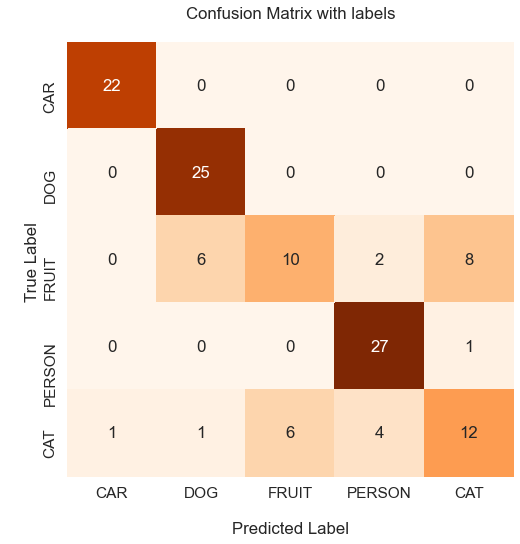

In [126]:
#evaluate best estimator
evaluate(clf,X_test,y_test)

## DF_DCD_TH_SIFT

In [129]:
num_data_csv =3
_,List_DF_without_header = path_build(PATH_DATA_CSV)
print("Data Features Study : ",List_DF_without_header[num_data_csv][0])
#Data preparation
X,y = split_data_without_head(List_DF_without_header[num_data_csv][1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#Train data whith cross validation using Kfold = 5 and shuffle = True
randomizedsearch = hyperparameter_tuning_randomrorestClassifier(X_train,y_train, X_test, y_test)
#Using best estimator
clf = randomizedsearch.best_estimator_

Data Features Study :  DF_DCD_TH_SIFT.csv
[INFO] Applying took 383.29 seconds


Model Performance
Average Error: 0.25 %.
Accuracy = 0.75%.
Classification_report :
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.77      0.96      0.86        25
           2       0.62      0.50      0.55        26
           3       0.75      0.96      0.84        28
           4       0.64      0.38      0.47        24

    accuracy                           0.75       125
   macro avg       0.74      0.75      0.73       125
weighted avg       0.74      0.75      0.73       125

Confusion_Matrix : 



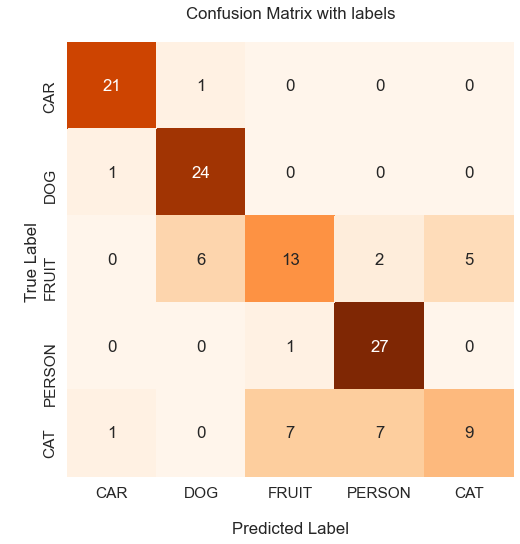

In [130]:
#evaluate best estimator
evaluate(clf,X_test,y_test)